## Import các thư viện cần thiết

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

## Khởi tạo bộ sinh số ngẫu nhiên

In [2]:
np.random.seed(2)

## Thiết lập các điểm dữ liệu

In [5]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
#print(X.shape)
#print(y.shape)

## Mở rộng dữ liệu, thêm x0 = 1

In [6]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
#print(X)

## Hàm sigmoid

In [5]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

## Hàm logistic sigmoid regression

In [6]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    
    # Mỗi điểm dữ liệu là một cột X[d * n]
    N = X.shape[1]
    d = X.shape[0]
    #print(N, d)
    
    count = 0
    check_w_after = 20 
    # Số vòng lặp để kiểm tra lại điều kiện hội tụ
    
    while count < max_count:
        # Mix data - Tạo ngẫu nhiên hoán vị theo SGD
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            # z = f(wT.x) = sigmoid(wT.x)
            zi = sigmoid(np.dot(w[-1].T, xi))
            
            # SGD for logistic regression: w = w + n(yi - zi) xi
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            
            # Check converege with last epoc update
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

## Test

In [7]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
print(w_init)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-0.41675785]
 [-0.05626683]]
20 2
[[-4.092695  ]
 [ 1.55277242]]


## Kết quả tìm được của Logistic Regression

In [8]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


## Biểu diễn kết quả trên đồ thị

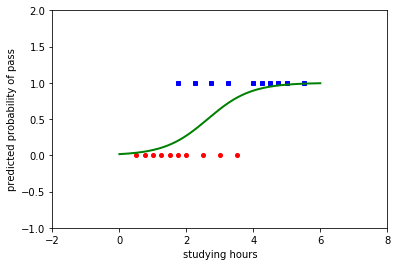

In [9]:
# Tập điểm nhãn = 0
X0 = X[1][np.where(y == 0)]
#print(X0)
# y0 = [0 0 .. 0]
y0 = y[np.where(y == 0)]
#print(y0)

# Tập điểm nhãn = 1
X1 = X[1][np.where(y == 1)]
#print(X1)
y1 = y[np.where(y == 1)]
#print(y1)

# Biển diễn 2 tập điểm trên đồ thị
plt.plot(X0, y0, 'ro', markersize = 4)
plt.plot(X1, y1, 'bs', markersize = 4)

# Biểu diễn đường bounary của Logistic Regression
xx = np.linspace(0, 6, 2000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
# yy = wT.x
yy = sigmoid(w0 + w1 * xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()